# Assignment 2

Kevin Martin <br>
Syracuse University <br>
CIS663 Wednesday @ 9:00pm EST

## Question 1

To complete Question 1, I recreated the table in Microsoft Excel and then was able to formulaically convert it to an integral image. From there, I followed the formula for area where area = C + A - D - B. Firt, the original image recreated in Excel:

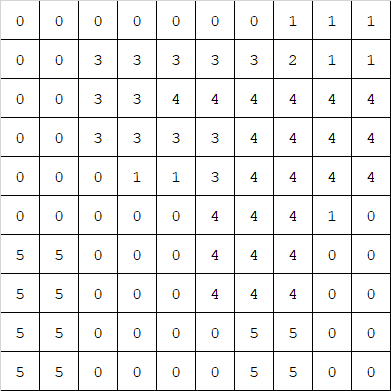

### a

The resulting integral image, dervied from a uniform formula in each cell:

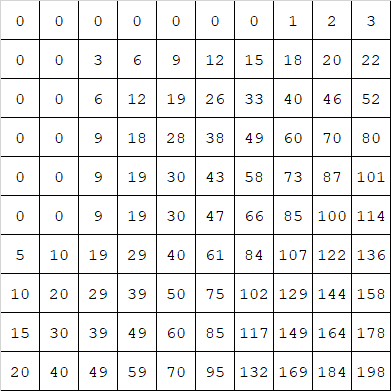

### b

In order to calculate the sum of the highlighted value, I found the appropriate values of A, B, C, and D and plugged them into the formula.

This resulted in an area of **67** for the highlighted area. 

See below the relevant values, where green indicated addition (for inputs A and C) and yellow indicated subtraction (for inputs B and D):

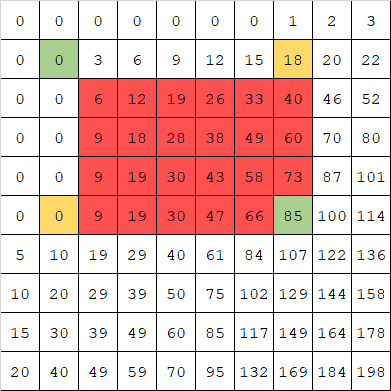

## Question 2

Using the original grayscale image from Question 1, I was able to apply the given Haar filter to all feasible positions using Excel again. In order to do so, I started from the upper left-most cell, and moved down and right, until all feasible positions had been viewed. First, see below the beginning and ending Haar filter positions for the given grayscale image:

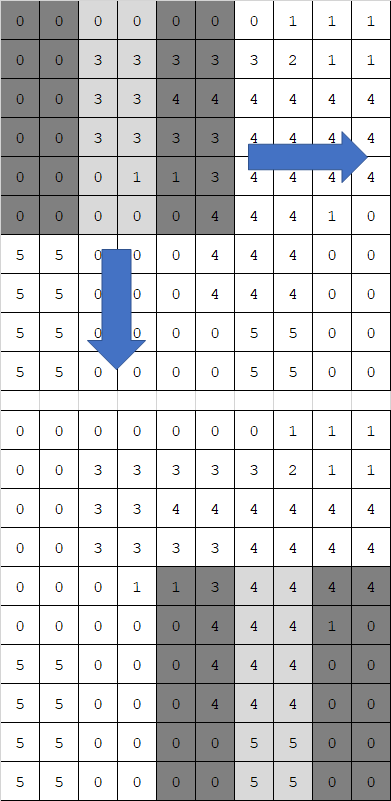

Next, see highlighted all the relevant "starting points" from the original image. Assumming the upper-left cell is in position (10,1), the deepest cell that could accept this Haar filter was cell (5, 6):

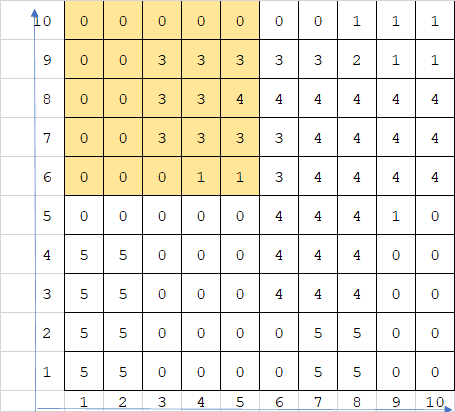

Finally, see the resulting **Haar Feature values**. Again, starting with point (10, 1) and moving down and right to cell (5, 6):

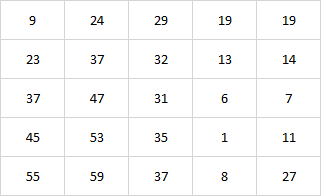

## Question 3

In the Viola-Jones face detection algorithm, cascading is an approach to image detection whereby a sequential series of classifiers is generated (often by the AdaBoost Algorithm), with each subsequent one more complicated/sophisticated than the previous. A sample image must "pass" through each algorithm before moving onto the next. If, at any point, one classifying algorithm rejects the sample (fails to identify it as positive), the image is immediately dropped from the sequence.

It is important because as algorithms increase in complexity, they also increase in computational expense. By allowing weaker, but faster, algorithms to sift through images first creates a weeding out process. Thus only the most likely candidates are shown to the most computationally expensive algorithms, which increases speed and efficiency throughout the process.

## Question 4


### a

The initial weights for the training data for all points are actually all set to the same initial value, given by the following formula:

*w($x_{i}$, $y_{i}$) = $\frac{1}{n}$, i = 1,..., n*

Simply equal weighting based on total population. In this case we have 10 samples, thus each weight is 1/10 (or 10%). For the data at points with index 4 and 7, both will have a weight of **0.1**

### b

The hypothesis $h_{i}$ that minimizes the weighted error in the first round of AdaBoost is the horizontal line y=4. As shown visually by the below graph, only the point at (8,8) is misclassified.

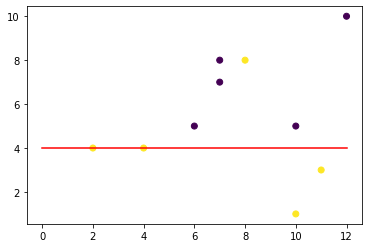

In [177]:
import matplotlib.pyplot as plt
import matplotlib.lines as mlines
import pandas as pd
import numpy as np
data = './q4.csv'
df =  pd.read_csv(data, sep=',') 
df['Label'] = df['Label'].astype('category').cat.codes
fig, ax = plt.subplots()
ax.scatter(df.x, df.y, c=df.Label)
line = mlines.Line2D([0,12], [4,4], color='red')
ax.add_line(line)
plt.show()

### c

The weighted error of $h_{1}$ is the individual weights of each missclassified point multipled together. Because we only have a single missclassified point, the weighted error is **0.1**

We can also use the given formulas to calcuate $\alpha$ uing $\beta$:

$\beta$ = 0.1/(1-.1) = 0.1111 <br>
$\alpha$ = log(1/0.1111) = 2.197

In [196]:
import math
def epsilon(t):
    tmp = 1
    for i in t:
        tmp = tmp * i
    return tmp
    
def beta(t):
    return epsilon(t)/(1 - epsilon(t))

def alpha(t):
    return (math.log(1/beta(t)))

def weights(t, flag):
    tmp = 1
    for i in t:
        tmp = tmp * i
    return tmp * beta(t) ** flag

errors = [.1]
alpha(errors)

2.1972245773362196

### d

Using the above formulas, we can find the weights fo both correctly classified and incorrectly classified data points. Next, we normalize so the total value of all weights equals 1. See results below:

In [197]:
err_weight = weights(errors, 0)
corr_weight = weights(errors, 1)
print('Incorrectly classified: ', err_weight)
print('Correclty classified: ', corr_weight)
print('Incorrectly classified - normalized: ', err_weight * 5)
print('Correctly classified - normalized: ', corr_weight * 5)

Incorrectly classified:  0.1
Correclty classified:  0.011111111111111113
Incorrectly classified - normalized:  0.5
Correctly classified - normalized:  0.055555555555555566


### e

The hypothesis $h_{2}$ that minimizes the weighted error in the second round of AdaBoost (using the distribution D2 computed previously) is the line where y = 9. See graph below. This now misclassifies four points (the four purple points inbetween the red lines). The weighted error of $h_{2}$ is .055 * 4 = .22

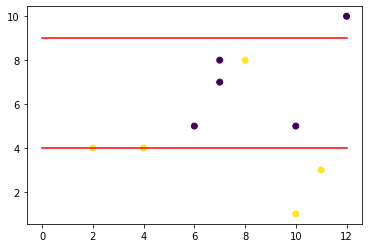

In [179]:
fig, ax = plt.subplots()
ax.scatter(df.x, df.y, c=df.Label)
line = mlines.Line2D([0,12], [4,4], color='red')
line2 = mlines.Line2D([0,12], [9,9], color='red')
ax.add_line(line)
ax.add_line(line2)
plt.show()

### f

The weight assigned to the hypothesis of round 2, $h_{2}$, is .22.

The alpha is 1.25657

In [198]:
errors2 = [.22]
err_weight2 = weights(errors2, 0)
print('H2 weight: ', err_weight2)
print('H2 alpha: ', alpha(errors2))

H2 weight:  0.22
H2 alpha:  1.2656663733312759


### g

The final weighted hypothesis after two rounds of AdaBoost are actually the same as the first round (meaning we were still unable to classify one of the points). Alphas shown below:

In [204]:
def alpha_h(x1, x2):
    return alpha(errors) * x1 + alpha(errors2) * x2

def h(i):
    if i > 0:
        return 1
    else:
        return 0

print('alpha h1: ', alpha_h(0,0), 'h1', h(alpha_h(0,0)))
print('alpha h2: ', alpha_h(0,0), 'h2', h(alpha_h(0,0)))
print('alpha h3: ', alpha_h(0,0), 'h3', h(alpha_h(0,0)))
print('alpha h4: ', alpha_h(1,1), 'h4', h(alpha_h(1,1)))
print('alpha h5: ', alpha_h(0,0), 'h5', h(alpha_h(0,0)))
print('alpha h6: ', alpha_h(1,0), 'h6', h(alpha_h(1,0)))
print('alpha h7: ', alpha_h(1,0), 'h7', h(alpha_h(1,0)))
print('alpha h8: ', alpha_h(1,0), 'h8', h(alpha_h(1,0)))
print('alpha h9: ', alpha_h(1,0), 'h9', h(alpha_h(1,0)))
print('alpha h10: ', alpha_h(1,0), 'h10', h(alpha_h(1,0)))

alpha h1:  0.0 h1 0
alpha h2:  0.0 h2 0
alpha h3:  0.0 h3 0
alpha h4:  3.4628909506674956 h4 1
alpha h5:  0.0 h5 0
alpha h6:  2.1972245773362196 h6 1
alpha h7:  2.1972245773362196 h7 1
alpha h8:  2.1972245773362196 h8 1
alpha h9:  2.1972245773362196 h9 1
alpha h10:  2.1972245773362196 h10 1


## Question 5

Principle Component Analysis (PCA) is, in short, the process of reducing data with dimensionality to lower dimensionality. More specifically, PCA reduces the observed variables or features into fewer. This helps to remove redundancy between similar features, as well as compress the data so it is easier to work with. The more stastistically important features can be identified this way, and also extracted to help reduce noisy data. PCA is especially helpful when their is a strong correlation between the variables. I have personaly used PCA to help identify the most relevant features. In once dataset, I had 15 available fields and through PCA I found that the top three features accounted for 90% of the variance in the data. As such, I was able to focus some of my further analysis around this finding.

PCA relates to face recogntion via compression. A 2D image of a face can be represented by a 1D array: each column of data can be appended to the end of antoher to create a single vector. However, these vectors can be very long and difficult to compute with. PCA can extract the vectors with the largest variance (the most statistically signficant ones). Each remaining vector can be considered a feature. When a face image is projected into thsi reduced space, the importance of each feature can be described by their weights. A new sample image is then projected into this reduced space, and the resulting weights are compared. Thus, by dealing with the relative weights of each feature, an image can be compared and a potential match can be found.